In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve,auc
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE


**PROBLEM** **STATEMENT**

The goal is to predict whether health insurance owners from past year would also be interested
or not in purchasing vehicle insurance coverage provided by the Company by using machine learning algorithms.

**DATA** **GATHERING**

In [3]:
df = pd.read_csv("train.csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56837,56838,Male,42,1,5.0,0,1-2 Year,No,22330.0,124.0,93,0
56838,56839,Male,30,1,41.0,1,< 1 Year,No,36904.0,152.0,154,0
56839,56840,Female,49,1,28.0,1,1-2 Year,No,48016.0,26.0,251,0
56840,56841,Female,23,1,35.0,1,< 1 Year,No,35697.0,152.0,129,0


**EXPLORATORY** **DATA** **ANALYSIS**

In [4]:
model_details = []
testing_accuracy = []
training_accuracy = []

In [5]:
df.shape

(56842, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56842 non-null  int64  
 1   Gender                56842 non-null  object 
 2   Age                   56842 non-null  int64  
 3   Driving_License       56842 non-null  int64  
 4   Region_Code           56842 non-null  float64
 5   Previously_Insured    56842 non-null  int64  
 6   Vehicle_Age           56842 non-null  object 
 7   Vehicle_Damage        56842 non-null  object 
 8   Annual_Premium        56842 non-null  float64
 9   Policy_Sales_Channel  56842 non-null  float64
 10  Vintage               56842 non-null  int64  
 11  Response              56842 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 5.2+ MB


In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000
mean,28421.500000,38.766546,0.997783,26.407586,0.458446,30537.745646,112.432884,154.272862,0.122937
std,16409.016338,15.505450,0.047030,13.188777,0.498275,17123.414502,54.018987,83.715704,0.328368
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,14211.250000,25.000000,1.000000,15.000000,0.000000,24373.000000,30.000000,82.000000,0.000000
50%,28421.500000,36.000000,1.000000,28.000000,0.000000,31706.000000,150.000000,154.000000,0.000000
75%,42631.750000,49.000000,1.000000,35.000000,1.000000,39532.750000,152.000000,227.000000,0.000000
max,56842.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df["Response"].value_counts()

0    49854
1     6988
Name: Response, dtype: int64

In [ ]:
# sns.countplot(df["Response"])   # WE NEED TO BALANCE OUR DATA

In [9]:
df["Gender"].value_counts()

Male      30619
Female    26223
Name: Gender, dtype: int64

In [10]:
df["Vehicle_Age"].value_counts()

1-2 Year     29782
< 1 Year     24688
> 2 Years     2372
Name: Vehicle_Age, dtype: int64

In [11]:
df["Vehicle_Damage"].value_counts()

Yes    28700
No     28142
Name: Vehicle_Damage, dtype: int64

In [12]:
df.isna().sum()*100        ## CHECKING MISSING VALUES

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

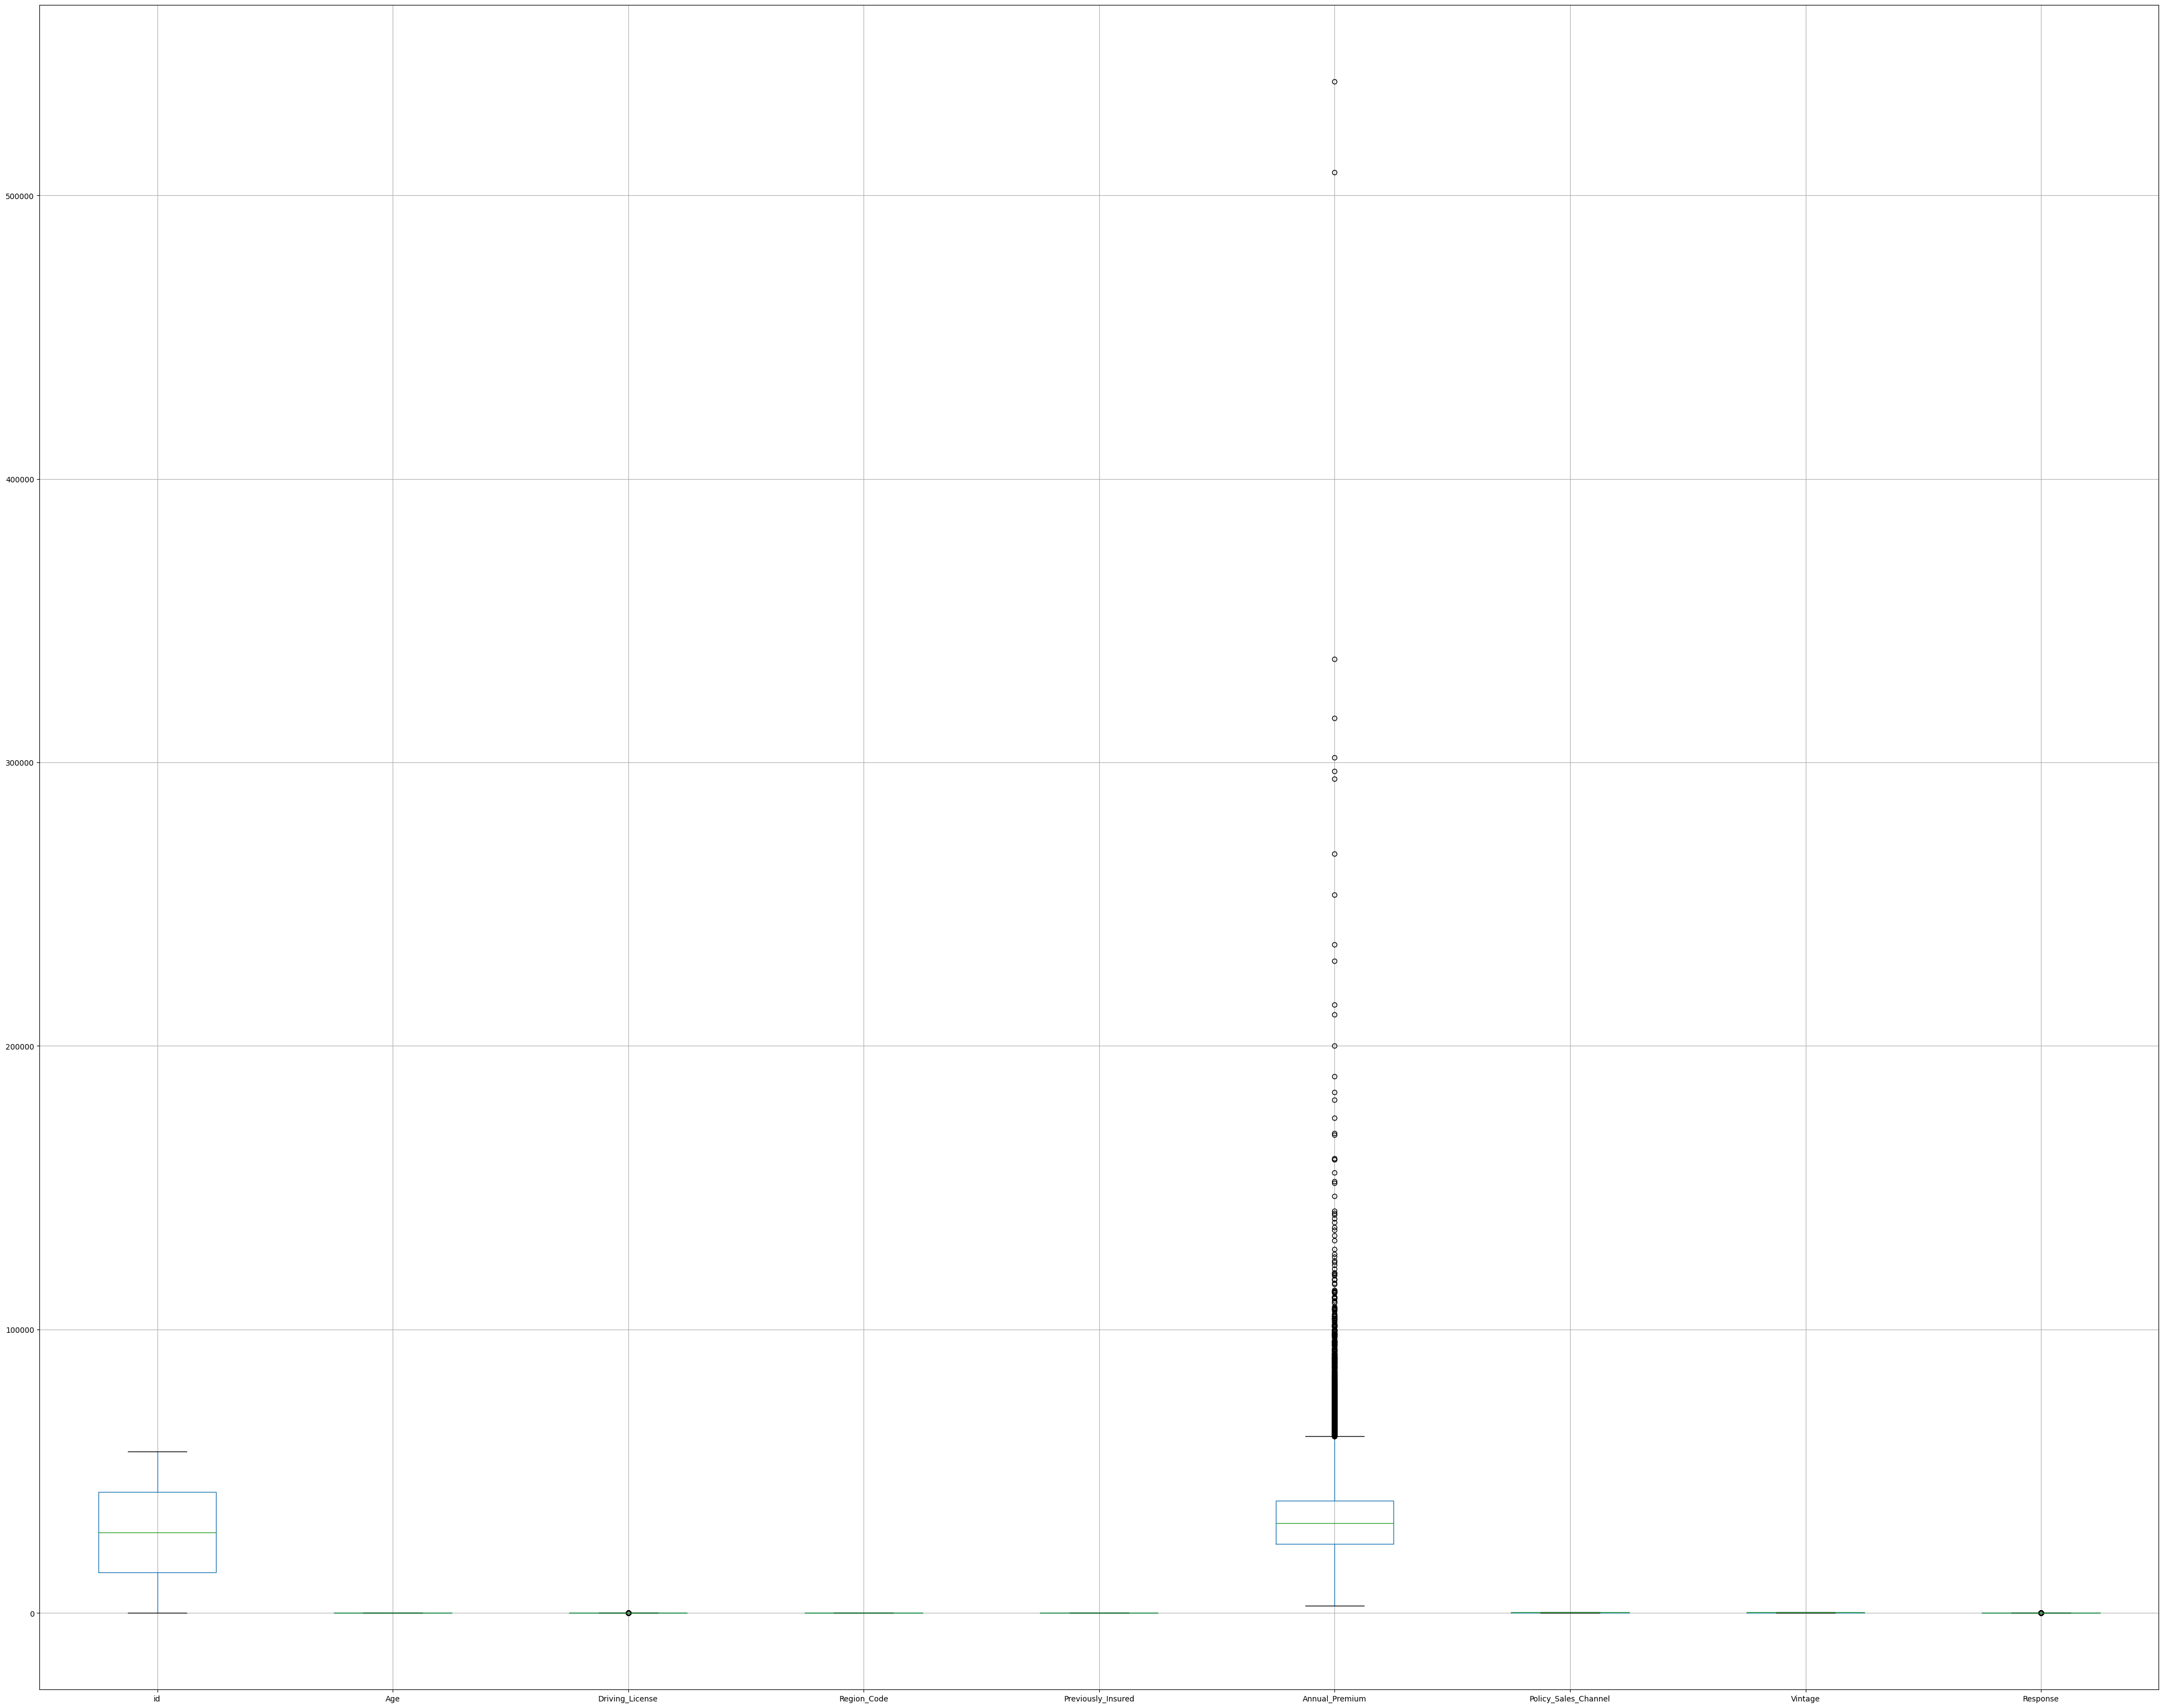

In [13]:
plt.figure(figsize = (50,40))
df.boxplot()                            #### DETECTING OUTLIERS

**FEATURE** **ENGINEERING**

In [14]:
df.drop("id",axis = 1 , inplace = True)

In [15]:
df["Gender"].replace({"Male":0, "Female":1}, inplace = True)
df["Vehicle_Age"].replace({"1-2 Year":0, "< 1 Year":1, "> 2 Years":2}, inplace = True)
df["Vehicle_Damage"].replace({"Yes":1, "No":0}, inplace = True)                                         #### # encoding

In [16]:
df.info()                        ### AFTER ENCODING

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                56842 non-null  int64  
 1   Age                   56842 non-null  int64  
 2   Driving_License       56842 non-null  int64  
 3   Region_Code           56842 non-null  float64
 4   Previously_Insured    56842 non-null  int64  
 5   Vehicle_Age           56842 non-null  int64  
 6   Vehicle_Damage        56842 non-null  int64  
 7   Annual_Premium        56842 non-null  float64
 8   Policy_Sales_Channel  56842 non-null  float64
 9   Vintage               56842 non-null  int64  
 10  Response              56842 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 4.8 MB


In [17]:
Gender  = ({"Male":0,"Female":1})
Vehicle_Age = ({"1-2 Year":0, "< 1 Year":1, "> 2 Years":2})
Vehicle_Damage = ({"Yes":1, "No":0})

<Axes: xlabel='Annual_Premium'>

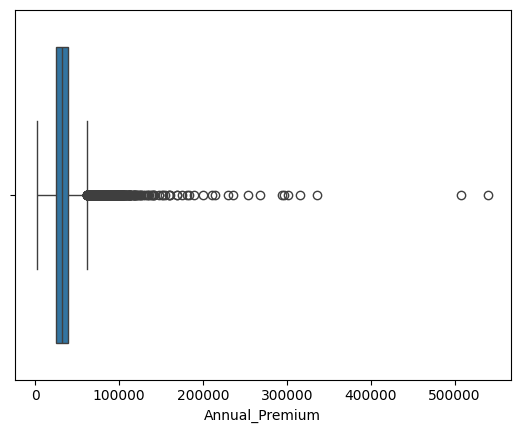

In [18]:
#### IMPUTING OUTIERS
sns.boxplot(x= df["Annual_Premium"])

In [19]:
q1 = df["Annual_Premium"].quantile(0.25)
q2 = df["Annual_Premium"].quantile(0.50)
q3 = df['Annual_Premium'].quantile(0.75)
median = df["Annual_Premium"].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 24373.0
Q2 : 31706.0
Q3 : 39532.75
Median : 31706.0
upper_tail : 62272.375
lower_tail : 1633.375


In [20]:
df.loc[df["Annual_Premium"] > upper_tail, 'Annual_Premium'] = upper_tail

<Axes: xlabel='Annual_Premium'>

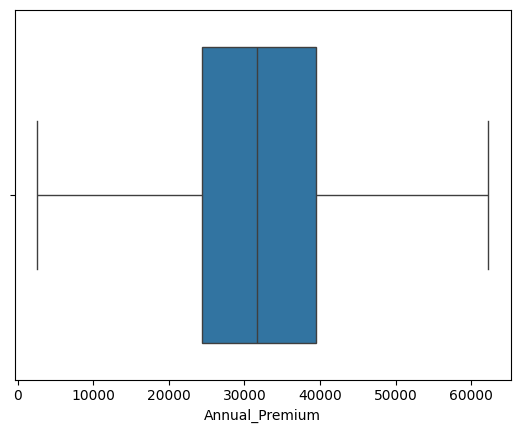

In [21]:
sns.boxplot(x=df["Annual_Premium"])

In [ ]:
##### SAMPLING

In [22]:
x = df.drop("Response", axis = 1)
y = df['Response']

In [23]:
smt = SMOTE(k_neighbors=5, sampling_strategy=0.8)
x_sample, y_sample = smt.fit_resample(x,y)
y_sample.value_counts()

0    49854
1    39883
Name: Response, dtype: int64

In [ ]:
# sns.countplot(df["Response"])   ## AFTER SAMPLING

**FEATURE** **SELECTION**

In [24]:
x = x_sample
y = y_sample

<Axes: >

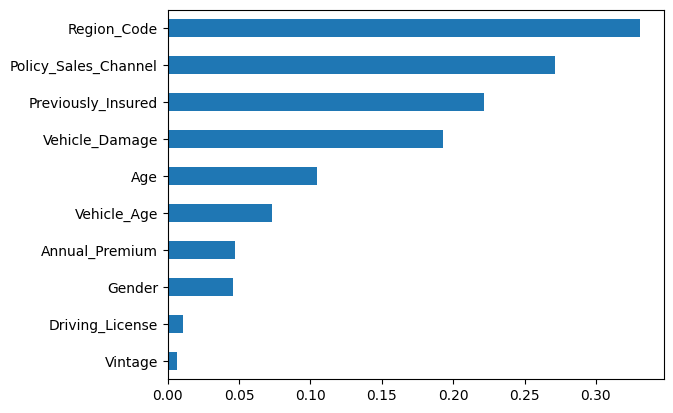

In [25]:
array1 = mutual_info_classif(x,y)

s2 = pd.Series(array1, index=x.columns)
s2.sort_values().plot(kind = 'barh')

**MODEL BUILDING AND MODEL** **EVALUATION**

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 , random_state=11, stratify=y)

In [ ]:
## LOGISTIC REGRESSION

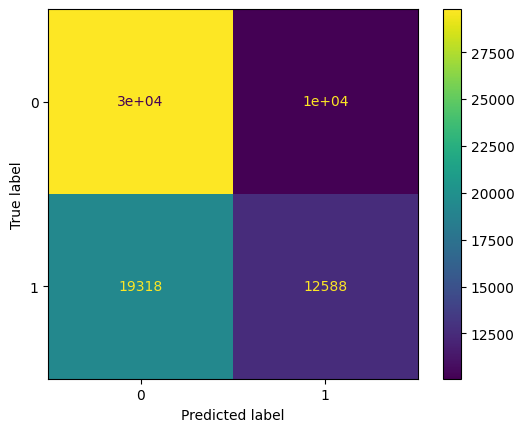


0.5904804357213501

              precision    recall  f1-score   support

           0       0.75      0.61      0.67     49120
           1       0.39      0.56      0.46     22669

    accuracy                           0.59     71789
   macro avg       0.57      0.58      0.57     71789
weighted avg       0.64      0.59      0.60     71789



In [27]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
model_details.append("logistic_regression")

y_pred_train = logistic_model.predict(x_train)


cm = confusion_matrix(y_train, y_pred_train, labels=logistic_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logistic_model.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)



print()
print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)



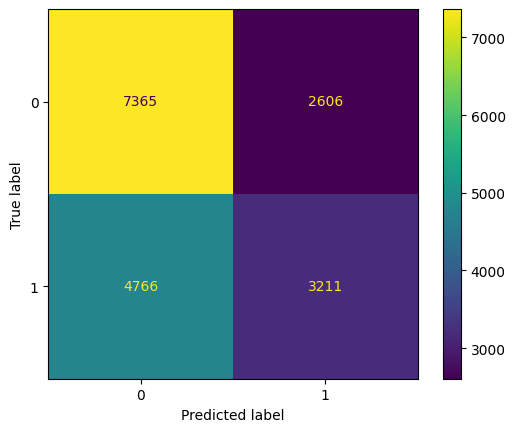


0.5892578560285269

              precision    recall  f1-score   support

           0       0.61      0.74      0.67      9971
           1       0.55      0.40      0.47      7977

    accuracy                           0.59     17948
   macro avg       0.58      0.57      0.57     17948
weighted avg       0.58      0.59      0.58     17948



In [28]:
y_pred_test = logistic_model.predict(x_test)


cm = confusion_matrix(y_test, y_pred_test, labels=logistic_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logistic_model.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_test, y_pred_test)

clf_report = classification_report(y_test, y_pred_test)



print()
print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [ ]:
## KNN ALGORITHM

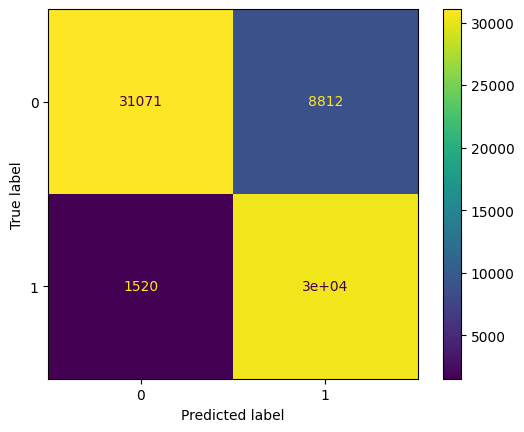


0.8560782292551784

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     32591
           1       0.95      0.78      0.85     39198

    accuracy                           0.86     71789
   macro avg       0.87      0.86      0.86     71789
weighted avg       0.87      0.86      0.86     71789



In [29]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
model_details.append("knn_model")


y_pred_train = knn_model.predict(x_train)


cm = confusion_matrix(y_train, y_pred_train, labels=knn_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_model.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)



print()
print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)




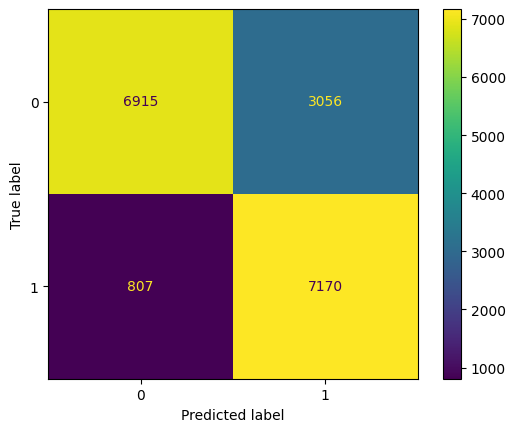


0.7847671049699131

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      9971
           1       0.70      0.90      0.79      7977

    accuracy                           0.78     17948
   macro avg       0.80      0.80      0.78     17948
weighted avg       0.81      0.78      0.78     17948



In [30]:
y_pred_test = knn_model.predict(x_test)


cm = confusion_matrix(y_test, y_pred_test, labels=knn_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_model.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_test, y_pred_test)

clf_report = classification_report(y_test, y_pred_test)



print()
print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [ ]:
## KNN WITH HYPERPARAMETER TUNING

In [31]:
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors" : np.arange(3,30),
                  "p": [1,2]}

gscv_knn_clf = GridSearchCV(knn_clf, param_grid, cv = 5 , n_jobs = -1)
gscv_knn_clf.fit(x_train, y_train)
gscv_knn_clf.best_estimator_

model_details.append("knn_model_with_Hyperparameter Tuning")

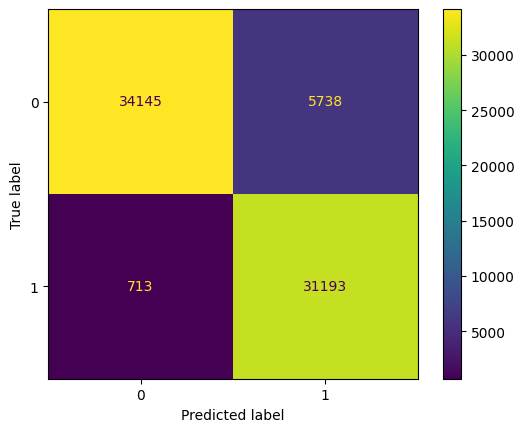


0.9101394364039059

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     34858
           1       0.98      0.84      0.91     36931

    accuracy                           0.91     71789
   macro avg       0.92      0.91      0.91     71789
weighted avg       0.92      0.91      0.91     71789



In [32]:
y_pred_train = gscv_knn_clf.predict(x_train)


cm = confusion_matrix(y_train, y_pred_train, labels=gscv_knn_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gscv_knn_clf.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)



print()
print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

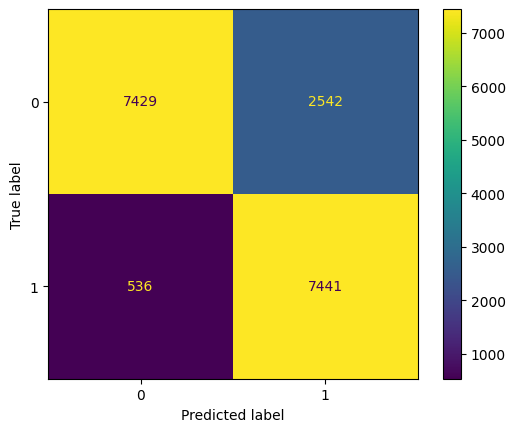


0.8285045687541788

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      9971
           1       0.75      0.93      0.83      7977

    accuracy                           0.83     17948
   macro avg       0.84      0.84      0.83     17948
weighted avg       0.85      0.83      0.83     17948



In [33]:
y_pred_test = gscv_knn_clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred_test, labels=gscv_knn_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gscv_knn_clf.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_test, y_pred_test)

clf_report = classification_report(y_test, y_pred_test)



print()
print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [ ]:
## DECISION TREE ALGORITHM

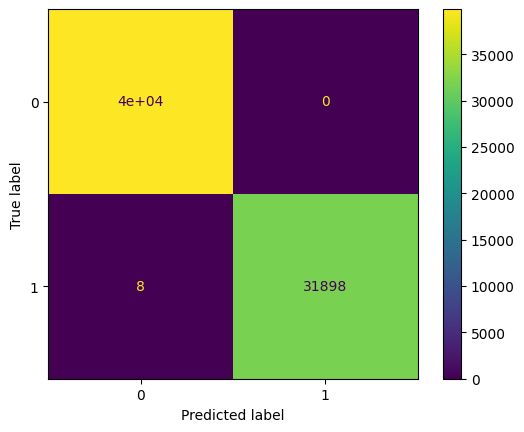


0.9998885623145607

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39891
           1       1.00      1.00      1.00     31898

    accuracy                           1.00     71789
   macro avg       1.00      1.00      1.00     71789
weighted avg       1.00      1.00      1.00     71789



In [34]:
dt_model = DecisionTreeClassifier(random_state=11)
dt_model.fit(x_train,y_train)
model_details.append("dicision_tree_model")


y_pred_train = dt_model.predict(x_train)


cm = confusion_matrix(y_train, y_pred_train, labels=dt_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_model.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)



print()
print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)



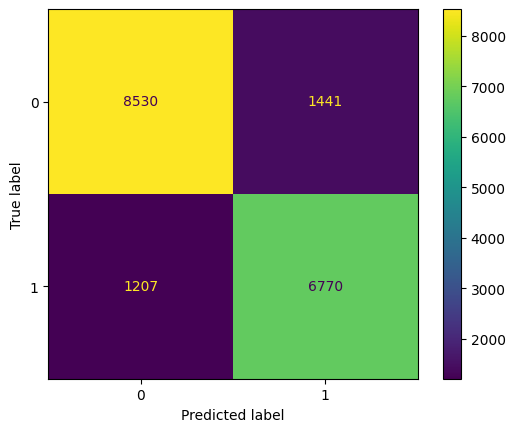


0.8524626699353688

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      9971
           1       0.82      0.85      0.84      7977

    accuracy                           0.85     17948
   macro avg       0.85      0.85      0.85     17948
weighted avg       0.85      0.85      0.85     17948



In [35]:
y_pred_test = dt_model.predict(x_test)


cm = confusion_matrix(y_test, y_pred_test, labels=dt_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_model.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_test, y_pred_test)

clf_report = classification_report(y_test, y_pred_test)



print()
print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [ ]:
## DECISION TREE WITH HYPERPARAMETER TUNING

In [36]:
dt_model = DecisionTreeClassifier(random_state=0)

hyperparameter = {"criterion":['gini', 'entropy'],
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}

gscv_dt_clf = RandomizedSearchCV(dt_model, hyperparameter, cv=5)
gscv_dt_clf.fit(x_train, y_train)
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=13,
                       random_state=0)

In [37]:
model_details.append("hyperparameter_tunning_on_decision_tree")

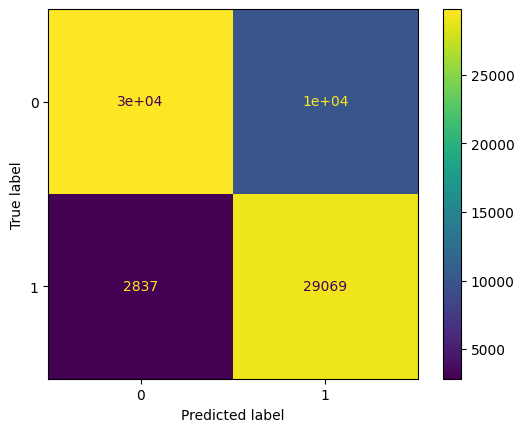


0.8200281380155734

              precision    recall  f1-score   support

           0       0.75      0.91      0.82     32637
           1       0.91      0.74      0.82     39152

    accuracy                           0.82     71789
   macro avg       0.83      0.83      0.82     71789
weighted avg       0.84      0.82      0.82     71789



In [38]:
y_pred_train = gscv_dt_clf.predict(x_train)


cm = confusion_matrix(y_train, y_pred_train, labels=gscv_dt_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gscv_dt_clf.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)



print()
print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

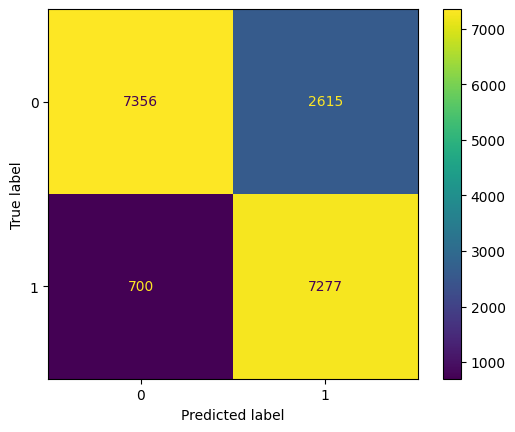


0.8152997548473367

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      9971
           1       0.74      0.91      0.81      7977

    accuracy                           0.82     17948
   macro avg       0.82      0.82      0.82     17948
weighted avg       0.83      0.82      0.82     17948



In [39]:
y_pred_test = gscv_dt_clf.predict(x_test)


cm = confusion_matrix(y_test, y_pred_test, labels=gscv_dt_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gscv_dt_clf.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_test, y_pred_test)

clf_report = classification_report(y_test, y_pred_test)



print()
print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [ ]:
## RANDOM FOREST ALGORITHM

In [40]:
rf_model = RandomForestClassifier(random_state=11)
rf_model.fit(x_train,y_train)
model_details.append("random_forest_model")

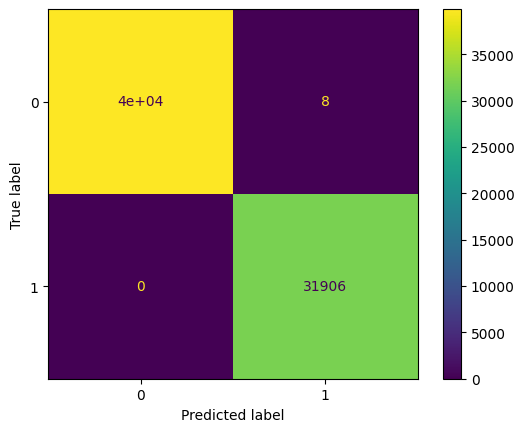


0.9998885623145607

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39875
           1       1.00      1.00      1.00     31914

    accuracy                           1.00     71789
   macro avg       1.00      1.00      1.00     71789
weighted avg       1.00      1.00      1.00     71789



In [41]:
y_pred_train = rf_model.predict(x_train)


cm = confusion_matrix(y_train, y_pred_train, labels=rf_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)



print()
print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

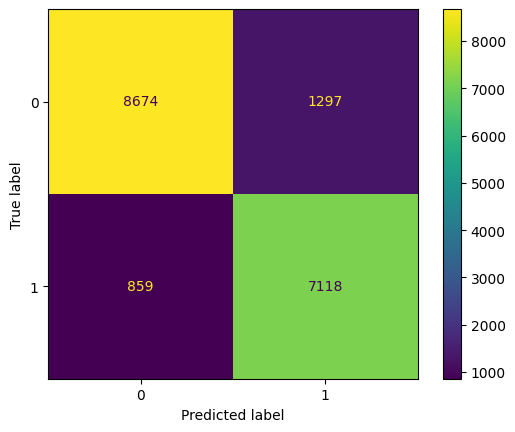


0.8798751950078003

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      9971
           1       0.85      0.89      0.87      7977

    accuracy                           0.88     17948
   macro avg       0.88      0.88      0.88     17948
weighted avg       0.88      0.88      0.88     17948



In [42]:
y_pred_test = rf_model.predict(x_test)


cm = confusion_matrix(y_test, y_pred_test, labels=rf_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_test, y_pred_test)

clf_report = classification_report(y_test, y_pred_test)



print()
print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [ ]:
#### RANDOM FOREST ALGORITHM WITH HYPERPARAMETER TUNING

In [43]:
rf_model = RandomForestClassifier(random_state=11)

param_grid = {"n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True]}


gscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
gscv_rf_model.fit(x_train, y_train)
model_details.append("hyperparameter_tunning_on_random_forest")
gscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=43, oob_score=True,
                       random_state=11)

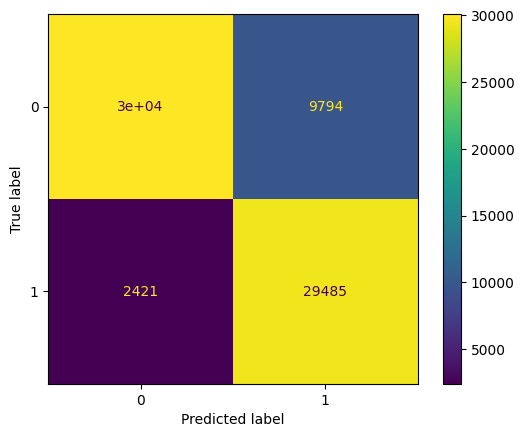


0.8298485840449094

              precision    recall  f1-score   support

           0       0.75      0.93      0.83     32510
           1       0.92      0.75      0.83     39279

    accuracy                           0.83     71789
   macro avg       0.84      0.84      0.83     71789
weighted avg       0.85      0.83      0.83     71789



In [44]:
y_pred_train = gscv_rf_model.predict(x_train)


cm = confusion_matrix(y_train, y_pred_train, labels=gscv_rf_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gscv_rf_model.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)



print()
print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

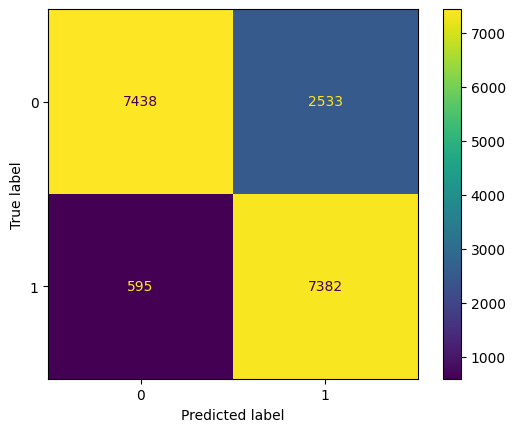


0.8257187430354357

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      9971
           1       0.74      0.93      0.83      7977

    accuracy                           0.83     17948
   macro avg       0.84      0.84      0.83     17948
weighted avg       0.85      0.83      0.83     17948



In [45]:
y_pred_test = gscv_rf_model.predict(x_test)


cm = confusion_matrix(y_test, y_pred_test, labels=gscv_rf_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gscv_rf_model.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_test, y_pred_test)

clf_report = classification_report(y_test, y_pred_test)



print()
print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [ ]:
## ADABOOST

In [46]:
adaboost = AdaBoostClassifier(random_state = 55)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(random_state=55)

In [47]:
model_details.append("adaboost_model")

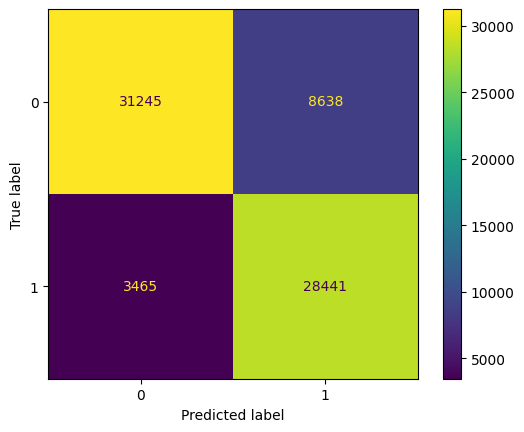


0.8314087116410592

              precision    recall  f1-score   support

           0       0.78      0.90      0.84     34710
           1       0.89      0.77      0.82     37079

    accuracy                           0.83     71789
   macro avg       0.84      0.83      0.83     71789
weighted avg       0.84      0.83      0.83     71789



In [48]:
y_pred_train = adaboost.predict(x_train)


cm = confusion_matrix(y_train, y_pred_train, labels=adaboost.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=adaboost.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)



print()
print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

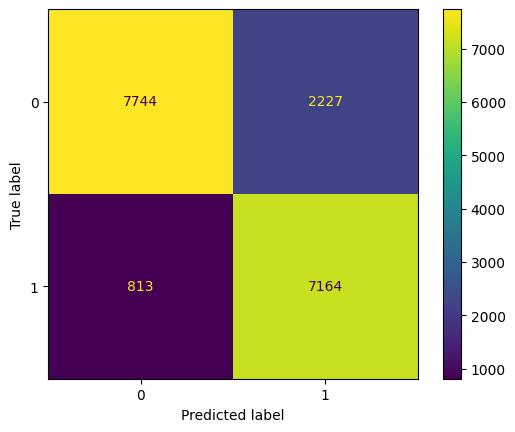


0.8306217963004234

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9971
           1       0.76      0.90      0.82      7977

    accuracy                           0.83     17948
   macro avg       0.83      0.84      0.83     17948
weighted avg       0.84      0.83      0.83     17948



In [49]:
y_pred_test = adaboost.predict(x_test)


cm = confusion_matrix(y_test, y_pred_test, labels=adaboost.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=adaboost.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_test, y_pred_test)

clf_report = classification_report(y_test, y_pred_test)



print()
print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [50]:
svm = SVC()
svm.fit(x_train , y_train)

SVC()

In [51]:
model_details.append("svm_model")

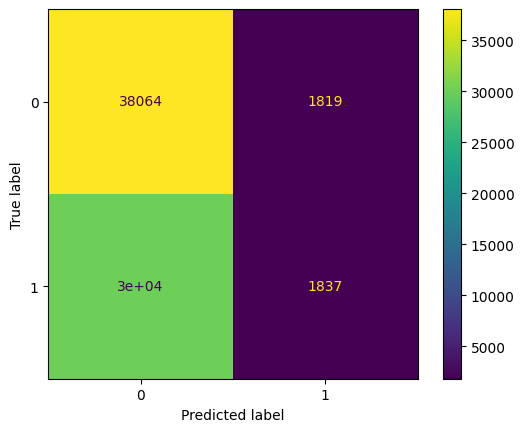


0.5558093858390561

              precision    recall  f1-score   support

           0       0.95      0.56      0.70     68133
           1       0.06      0.50      0.10      3656

    accuracy                           0.56     71789
   macro avg       0.51      0.53      0.40     71789
weighted avg       0.91      0.56      0.67     71789



In [52]:
y_pred_train = svm.predict(x_train)


cm = confusion_matrix(y_train, y_pred_train, labels=svm.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)



print()
print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

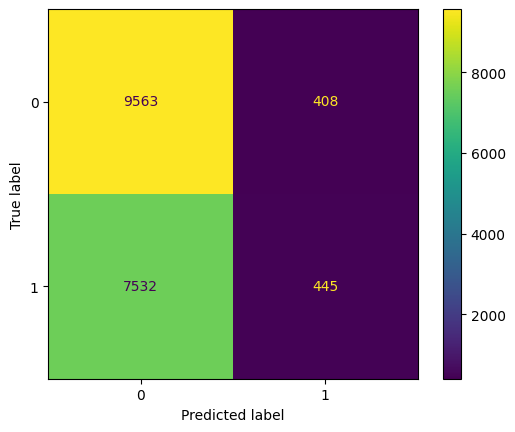


0.557610875863606

              precision    recall  f1-score   support

           0       0.56      0.96      0.71      9971
           1       0.52      0.06      0.10      7977

    accuracy                           0.56     17948
   macro avg       0.54      0.51      0.40     17948
weighted avg       0.54      0.56      0.44     17948



In [53]:
y_pred_test = svm.predict(x_test)


cm = confusion_matrix(y_test, y_pred_test, labels=svm.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

plt.show()

accuracy =  accuracy_score(y_test, y_pred_test)

clf_report = classification_report(y_test, y_pred_test)



print()
print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

**OVERALL** **COMPARISON**

In [54]:
comparison = pd.DataFrame({"moedl_details":model_details, "training_accuracy":training_accuracy,"testing_accuracy":testing_accuracy})

In [55]:
comparison

,moedl_details,training_accuracy,testing_accuracy
0,logistic_regression,0.590480,0.589258
1,knn_model,0.856078,0.784767
2,knn_model_with_Hyperparameter Tuning,0.910139,0.828505
3,dicision_tree_model,0.999889,0.852463
4,hyperparameter_tunning_on_decision_tree,0.820028,0.815300
5,random_forest_model,0.999889,0.879875
6,hyperparameter_tunning_on_random_forest,0.829849,0.825719
7,adaboost_model,0.831409,0.830622
8,svm_model,0.555809,0.557611


**SAVING** **MODEL**

In [56]:
import pickle
with open ("adaboost_model.pkl","wb")as f:
    pickle.dump(adaboost,f)

In [60]:
column_names = x_train.columns
column_names

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [61]:
json_data = {"Gender":Gender,"Vehicle_Age":Vehicle_Age,"Vehicle_Damage":Vehicle_Damage,
             "column":list(column_names)}

In [62]:
import json

with open ("json_file.json","w")as f:
    json.dump(json_data,f)

**SINGLE USER INPUT**

In [67]:
df.head(1).T

,0
Gender,0.0
Age,44.0
Driving_License,1.0
Region_Code,28.0
Previously_Insured,0.0
Vehicle_Age,2.0
Vehicle_Damage,1.0
Annual_Premium,40454.0
Policy_Sales_Channel,26.0
Vintage,217.0


In [68]:
Gender = "Male"
Age =	44.0
Driving_License	= 1.0
Region_Code	= 28.0
Previously_Insured	= 0.0
Vehicle_Age =	"> 2 Years"
Vehicle_Damage	= "Yes"
Annual_Premium	= 40454.0
Policy_Sales_Channel	= 26.0
Vintage	= 217.0
Response =	1.0

In [69]:
array = np.zeros(len(column_names))

array[0] = json_data["Gender"][Gender]
array[1] = Age
array[2] = Driving_License
array[3] = Region_Code


array[4] = Previously_Insured
array[5] = json_data["Vehicle_Age"][Vehicle_Age]
array[6] = json_data["Vehicle_Damage"][Vehicle_Damage]
array[7] = Annual_Premium
array[8] = Policy_Sales_Channel
array[9] = Vintage


array([0.0000e+00, 4.4000e+01, 1.0000e+00, 2.8000e+01, 0.0000e+00,
       2.0000e+00, 1.0000e+00, 4.0454e+04, 2.6000e+01, 2.1700e+02])

In [71]:
Response = adaboost.predict([array])[0]
Response


1

In [72]:
if Response == 1:
  print("Response",Response)
  print("Yes,health insurance owners are interested ")
else:
    print("No,health insurance owners are interested")

Response 1
Yes,health insurance owners are interested 
